In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("hypothyroid.csv")
df

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,negative
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,negative
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,negative
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,negative
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,f,?,other,negative
3768,68,F,f,f,f,f,f,f,f,f,...,t,124,t,1.08,t,114,f,?,SVI,negative
3769,74,F,f,f,f,f,f,f,f,f,...,t,112,t,1.07,t,105,f,?,other,negative
3770,72,M,f,f,f,f,f,f,f,f,...,t,82,t,0.94,t,87,f,?,SVI,negative


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3772 non-null   object
 1   sex                        3772 non-null   object
 2   on_thyroxine               3772 non-null   object
 3   query_on_thyroxine         3772 non-null   object
 4   on_antithyroid_medication  3772 non-null   object
 5   sick                       3772 non-null   object
 6   pregnant                   3772 non-null   object
 7   thyroid_surgery            3772 non-null   object
 8   I131_treatment             3772 non-null   object
 9   query_hypothyroid          3772 non-null   object
 10  query_hyperthyroid         3772 non-null   object
 11  lithium                    3772 non-null   object
 12  goitre                     3772 non-null   object
 13  tumor                      3772 non-null   object
 14  hypopitu

In [4]:
df.describe()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
count,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,...,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772
unique,94,3,2,2,2,2,2,2,2,2,...,2,242,2,147,2,235,1,1,5,4
top,59,F,f,f,f,f,f,f,f,f,...,t,?,t,?,t,?,f,?,other,negative
freq,95,2480,3308,3722,3729,3625,3719,3719,3713,3538,...,3541,231,3385,387,3387,385,3772,3772,2201,3481


Observations:
- First we need to change data type respectively for that we need to impute np.nan value instead of "?"

In [5]:
for col in df.columns:
    count=df[col][df[col]=='?'].count()
    if count!=0:
        print(col,df[col][df[col]=='?'].count())

age 1
sex 150
TSH 369
T3 769
TT4 231
T4U 387
FTI 385
TBG 3772


We can see that this many columns are having "?" as kind of no values so will impute

In [6]:
# we will use numpy nan to impute
for col in df.columns:
    count=df[col][df[col]=="?"].count()
    if count!=0:
        df[col]=df[col].replace('?',np.nan)
        print(col,df[col][df[col]=="?"].count())

age 0
sex 0
TSH 0
T3 0
TT4 0
T4U 0
FTI 0
TBG 0


In [7]:
df.dtypes

age                           object
sex                           object
on_thyroxine                  object
query_on_thyroxine            object
on_antithyroid_medication     object
sick                          object
pregnant                      object
thyroid_surgery               object
I131_treatment                object
query_hypothyroid             object
query_hyperthyroid            object
lithium                       object
goitre                        object
tumor                         object
hypopituitary                 object
psych                         object
TSH_measured                  object
TSH                           object
T3_measured                   object
T3                            object
TT4_measured                  object
TT4                           object
T4U_measured                  object
T4U                           object
FTI_measured                  object
FTI                           object
TBG_measured                  object
T

In [8]:
# we need to see that in some of the columns are float values present?
col=['age','TSH','T3','TT4','T4U','FTI']

for i in col:

    print(df[i])
       
    
    

0       41
1       23
2       46
3       70
4       70
        ..
3767    30
3768    68
3769    74
3770    72
3771    64
Name: age, Length: 3772, dtype: object
0        1.3
1        4.1
2       0.98
3       0.16
4       0.72
        ... 
3767     NaN
3768       1
3769     5.1
3770     0.7
3771       1
Name: TSH, Length: 3772, dtype: object
0       2.5
1         2
2       NaN
3       1.9
4       1.2
       ... 
3767    NaN
3768    2.1
3769    1.8
3770      2
3771    2.2
Name: T3, Length: 3772, dtype: object
0       125
1       102
2       109
3       175
4        61
       ... 
3767    NaN
3768    124
3769    112
3770     82
3771     99
Name: TT4, Length: 3772, dtype: object
0       1.14
1        NaN
2       0.91
3        NaN
4       0.87
        ... 
3767     NaN
3768    1.08
3769    1.07
3770    0.94
3771    1.07
Name: T4U, Length: 3772, dtype: object
0       109
1       NaN
2       120
3       NaN
4        70
       ... 
3767    NaN
3768    114
3769    105
3770     87
3771     92
Nam

observation:
- T4U T3 TSH  are float
- age TT4  FTI   are int
- Now we need to delete nan values so that we can change data type

In [9]:
df=df.drop("TBG",axis=1)
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,referral_source,Class
0,41,F,f,f,f,f,f,f,f,f,...,2.5,t,125,t,1.14,t,109,f,SVHC,negative
1,23,F,f,f,f,f,f,f,f,f,...,2,t,102,f,NaN,f,NaN,f,other,negative
2,46,M,f,f,f,f,f,f,f,f,...,NaN,t,109,t,0.91,t,120,f,other,negative
3,70,F,t,f,f,f,f,f,f,f,...,1.9,t,175,f,NaN,f,NaN,f,other,negative
4,70,F,f,f,f,f,f,f,f,f,...,1.2,t,61,t,0.87,t,70,f,SVI,negative


In [10]:
df=df.dropna()

In [11]:
df.shape

(2643, 29)

In [12]:
df=df.reset_index(drop=True)

In [13]:
df

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,referral_source,Class
0,41,F,f,f,f,f,f,f,f,f,...,2.5,t,125,t,1.14,t,109,f,SVHC,negative
1,70,F,f,f,f,f,f,f,f,f,...,1.2,t,61,t,0.87,t,70,f,SVI,negative
2,80,F,f,f,f,f,f,f,f,f,...,0.6,t,80,t,0.7,t,115,f,SVI,negative
3,66,F,f,f,f,f,f,f,f,f,...,2.2,t,123,t,0.93,t,132,f,SVI,negative
4,68,M,f,f,f,f,f,f,f,f,...,1.6,t,83,t,0.89,t,93,f,SVI,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2638,19,F,f,f,f,f,f,f,f,f,...,2.7,t,108,t,1.11,t,97,f,other,compensated_hypothyroid
2639,68,F,f,f,f,f,f,f,f,f,...,2.1,t,124,t,1.08,t,114,f,SVI,negative
2640,74,F,f,f,f,f,f,f,f,f,...,1.8,t,112,t,1.07,t,105,f,other,negative
2641,72,M,f,f,f,f,f,f,f,f,...,2,t,82,t,0.94,t,87,f,SVI,negative


In [14]:
# converting them in to respective data types
dict={
    'age':int,
    'TSH':float,
    'T3' :float,
    'TT4':float,
    'T4U':float,
    'FTI':float
    
}
df=df.astype(dict)

In [15]:
# because of some issues like typcasting we have converted integer column in to floats now will again typecast them in to int
col=['TT4','FTI']
for var in col:
    df[var]=df[var].astype(int)

In [16]:
df.dtypes

age                            int32
sex                           object
on_thyroxine                  object
query_on_thyroxine            object
on_antithyroid_medication     object
sick                          object
pregnant                      object
thyroid_surgery               object
I131_treatment                object
query_hypothyroid             object
query_hyperthyroid            object
lithium                       object
goitre                        object
tumor                         object
hypopituitary                 object
psych                         object
TSH_measured                  object
TSH                          float64
T3_measured                   object
T3                           float64
TT4_measured                  object
TT4                            int32
T4U_measured                  object
T4U                          float64
FTI_measured                  object
FTI                            int32
TBG_measured                  object
r

OBSERVATION:
    1. Till this point we are ready to perform EDA on our data in a specific manner
    
EDA --- UNIVARIATE AND BIVARIATE ANALYSIS of thyroid dataset

In [17]:
# First we will separate categorical and numerical data
numeric_data = df.select_dtypes(include=[np.number])
categorical_data = df.select_dtypes(exclude=[np.number])

In [18]:
# created target in other variable to add on with numeric data
target=df['Class']

In [19]:
categorical_data

,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,...,hypopituitary,psych,TSH_measured,T3_measured,TT4_measured,T4U_measured,FTI_measured,TBG_measured,referral_source,Class
0,F,f,f,f,f,f,f,f,f,f,...,f,f,t,t,t,t,t,f,SVHC,negative
1,F,f,f,f,f,f,f,f,f,f,...,f,f,t,t,t,t,t,f,SVI,negative
2,F,f,f,f,f,f,f,f,f,f,...,f,f,t,t,t,t,t,f,SVI,negative
3,F,f,f,f,f,f,f,f,f,f,...,f,f,t,t,t,t,t,f,SVI,negative
4,M,f,f,f,f,f,f,f,f,f,...,f,f,t,t,t,t,t,f,SVI,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2638,F,f,f,f,f,f,f,f,f,f,...,f,f,t,t,t,t,t,f,other,compensated_hypothyroid
2639,F,f,f,f,f,f,f,f,f,f,...,f,f,t,t,t,t,t,f,SVI,negative
2640,F,f,f,f,f,f,f,f,f,t,...,f,f,t,t,t,t,t,f,other,negative
2641,M,f,f,f,f,f,f,f,f,f,...,f,f,t,t,t,t,t,f,SVI,negative


In [20]:
numeric_data

,age,TSH,T3,TT4,T4U,FTI
0,41,1.30,2.5,125,1.14,109
1,70,0.72,1.2,61,0.87,70
2,80,2.20,0.6,80,0.70,115
3,66,0.60,2.2,123,0.93,132
4,68,2.40,1.6,83,0.89,93
...,...,...,...,...,...,...
2638,19,8.80,2.7,108,1.11,97
2639,68,1.00,2.1,124,1.08,114
2640,74,5.10,1.8,112,1.07,105
2641,72,0.70,2.0,82,0.94,87


In [21]:
numeric_data['Target']=target

In [22]:
numeric_data

,age,TSH,T3,TT4,T4U,FTI,Target
0,41,1.30,2.5,125,1.14,109,negative
1,70,0.72,1.2,61,0.87,70,negative
2,80,2.20,0.6,80,0.70,115,negative
3,66,0.60,2.2,123,0.93,132,negative
4,68,2.40,1.6,83,0.89,93,negative
...,...,...,...,...,...,...,...
2638,19,8.80,2.7,108,1.11,97,compensated_hypothyroid
2639,68,1.00,2.1,124,1.08,114,negative
2640,74,5.10,1.8,112,1.07,105,negative
2641,72,0.70,2.0,82,0.94,87,negative


<Figure size 432x288 with 0 Axes>

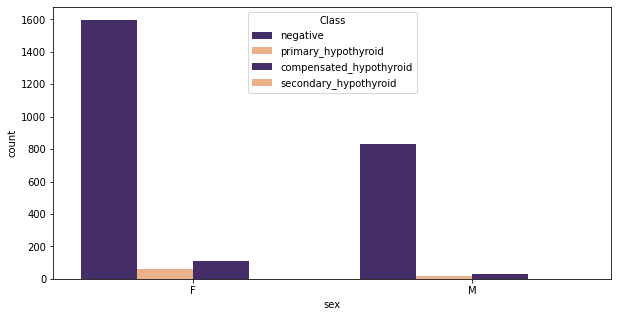

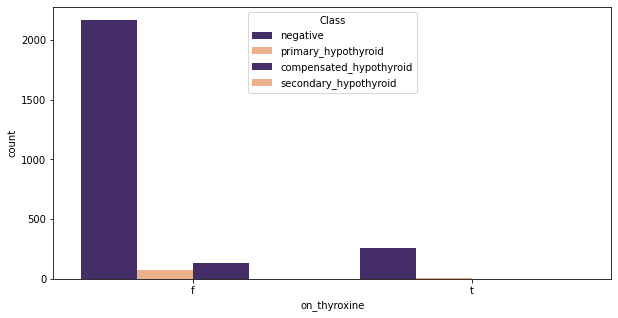

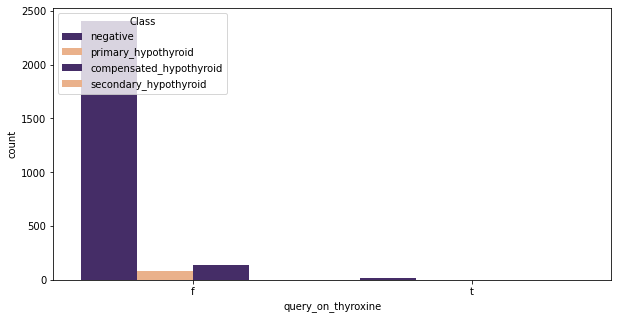

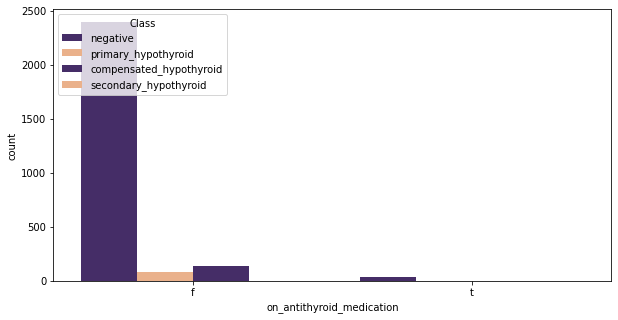

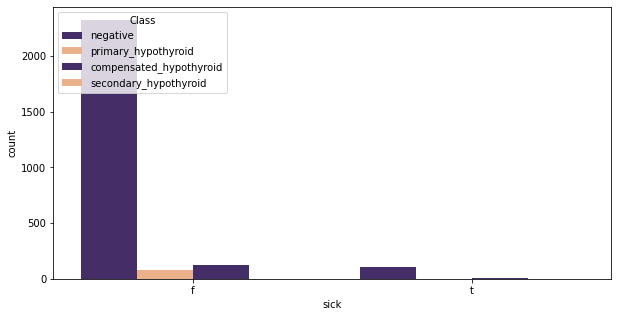

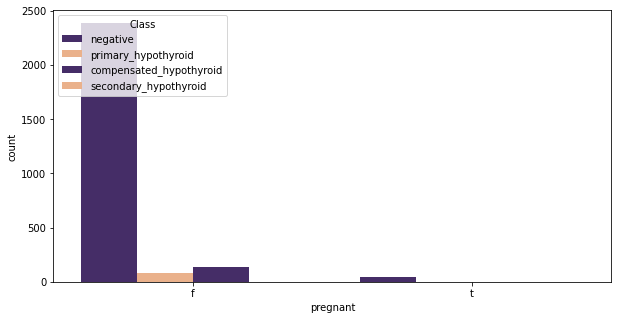

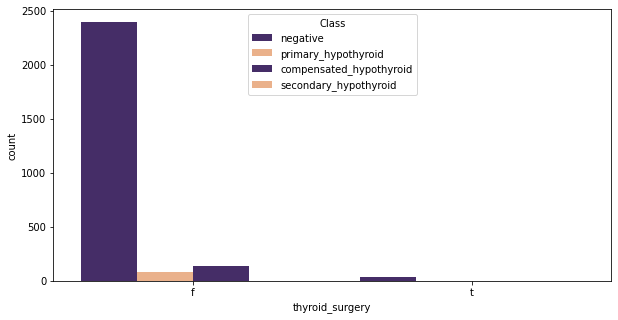

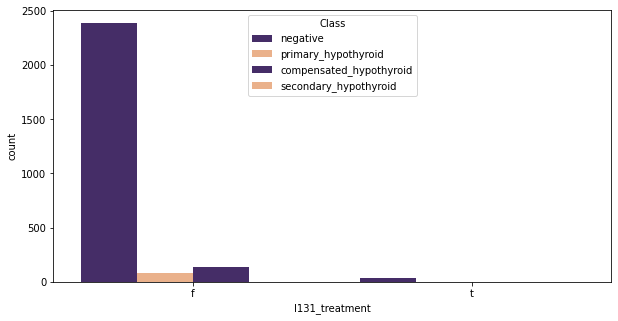

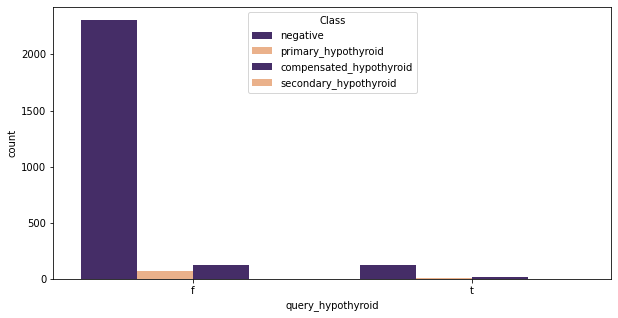

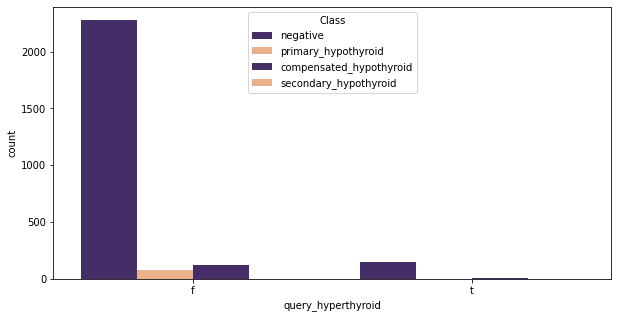

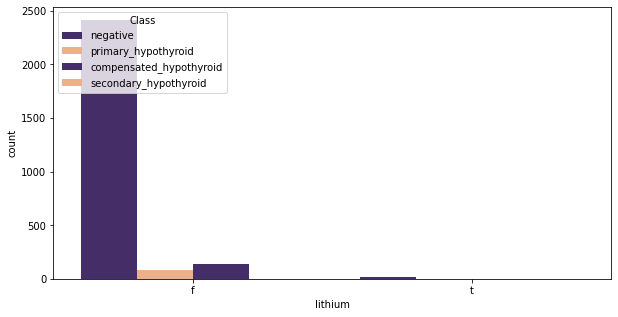

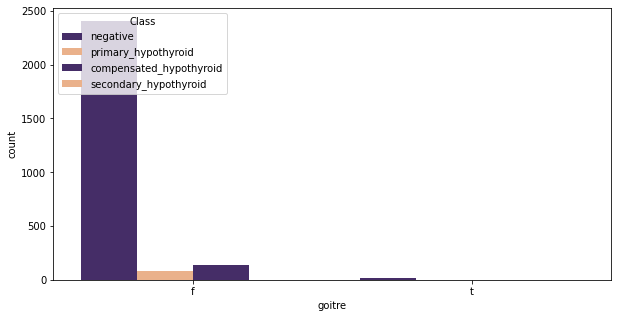

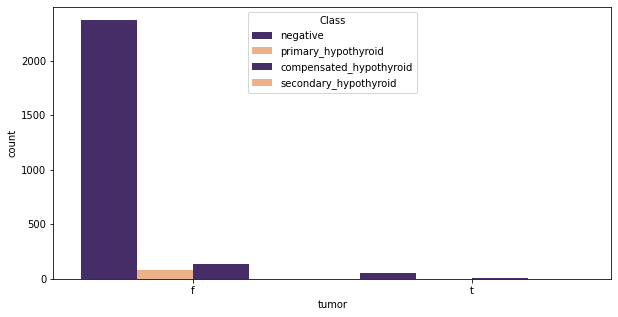

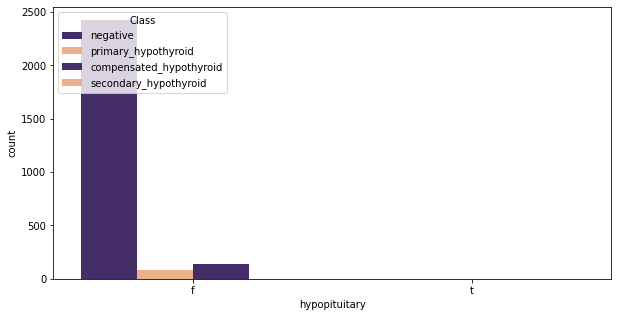

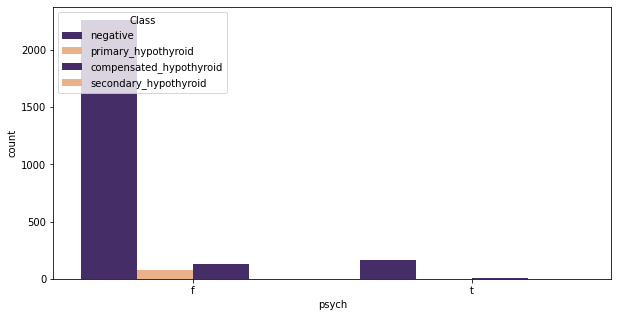

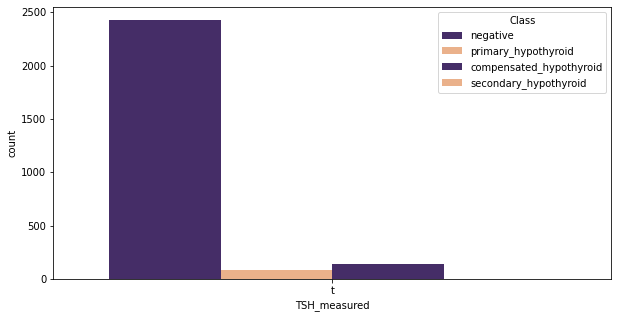

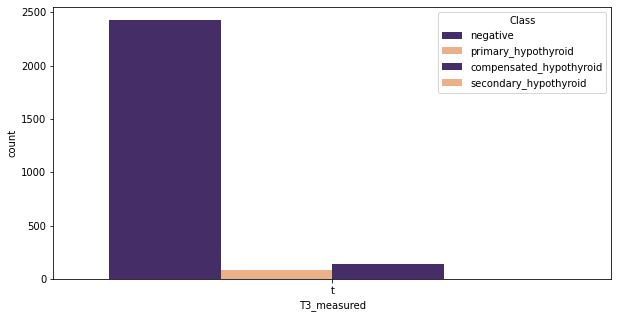

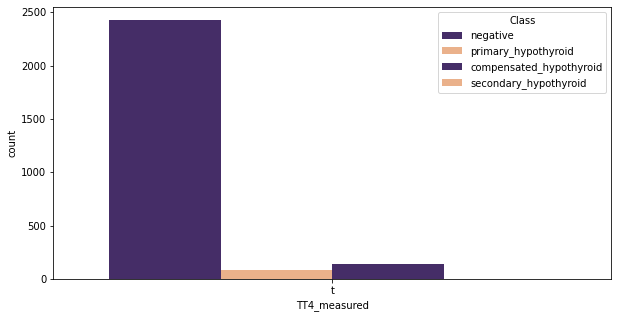

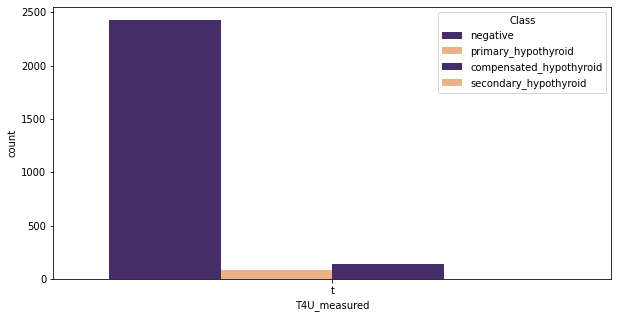

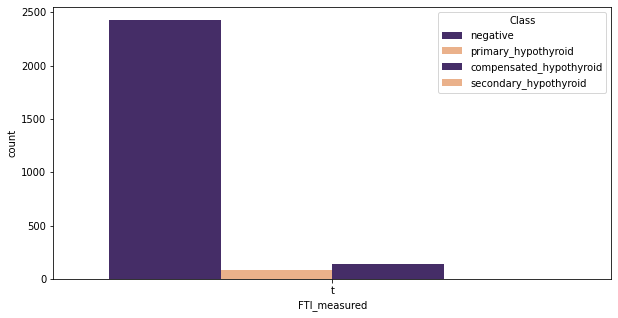

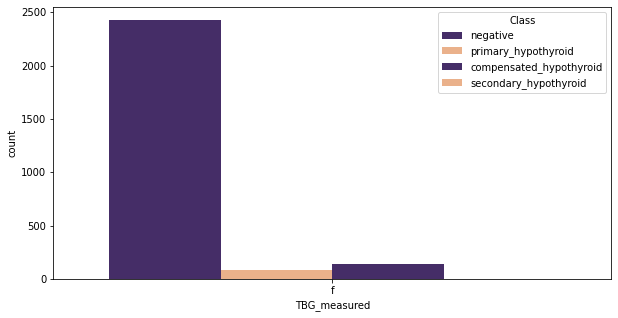

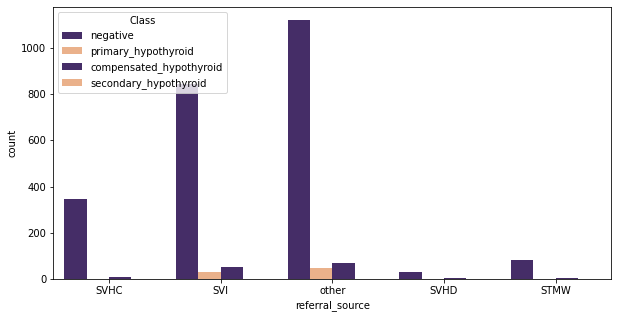

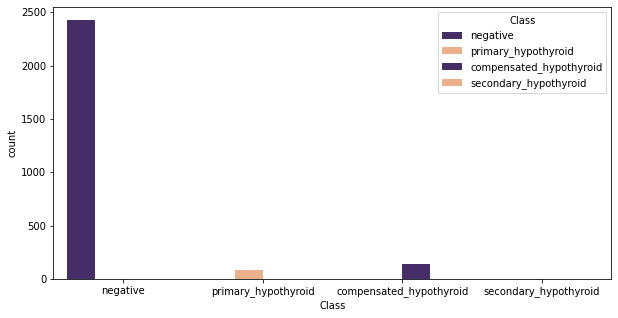

In [23]:
for i, col in enumerate(categorical_data.columns):
    plt.figure(i)
    plt.figure(figsize = (10,5))
    plt.xlabel(col)

    sns.countplot(x=col, data=categorical_data,hue='Class',palette= ['#432371',"#FAAE7B"])

<AxesSubplot:xlabel='FTI', ylabel='age'>

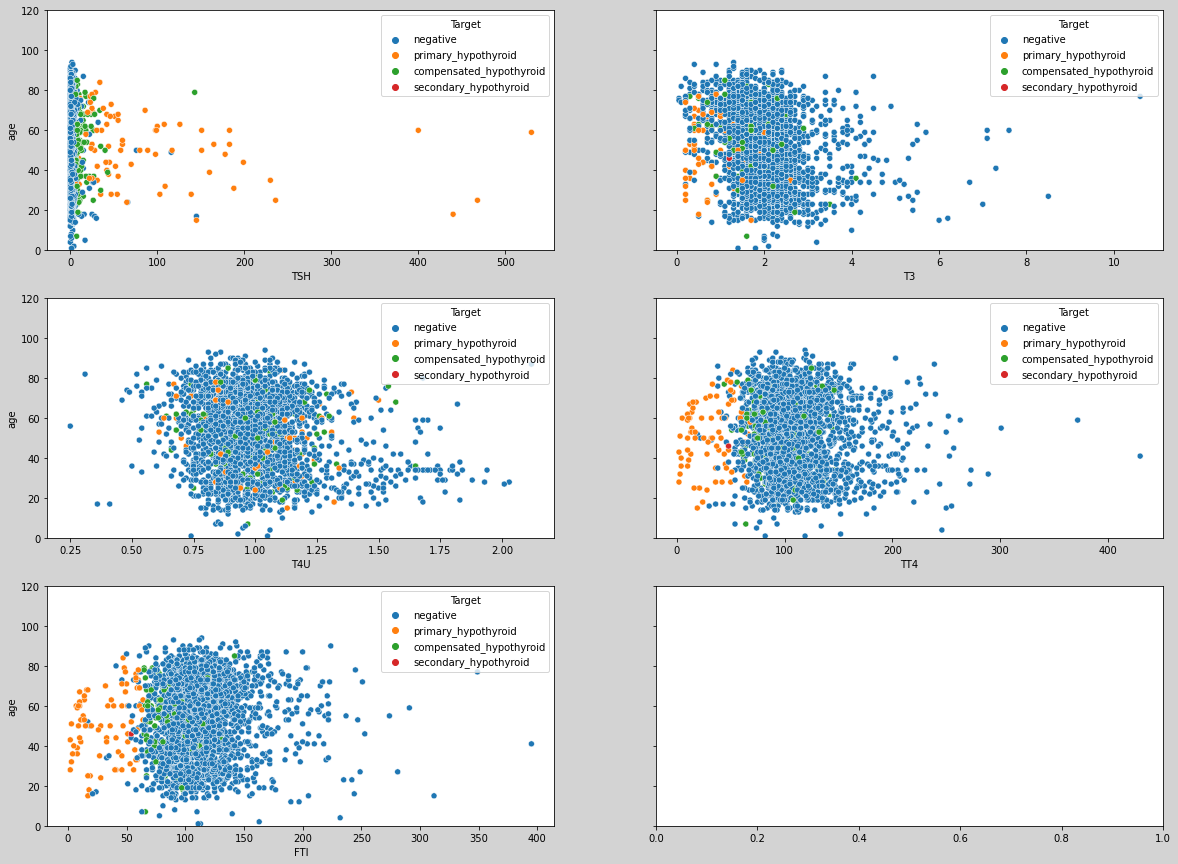

In [50]:

fig,axes = plt.subplots(3,2,sharey=True,figsize = (20,15),facecolor='lightgray')
axes[0,0].set_ylim(0,120)
sns.scatterplot(ax=axes[0,0],x = numeric_data['TSH'],y = numeric_data['age'], hue=numeric_data['Target']);
sns.scatterplot(ax=axes[0,1],x = numeric_data['T3'],y = numeric_data['age'], hue=numeric_data['Target']);
sns.scatterplot(ax=axes[1,0],x = numeric_data['T4U'],y=numeric_data['age'],hue=numeric_data['Target'])
sns.scatterplot(ax=axes[1,1],x = numeric_data['TT4'],y=numeric_data['age'],hue=numeric_data['Target'])
sns.scatterplot(ax=axes[2,0],x = numeric_data['FTI'],y=numeric_data['age'],hue=numeric_data['Target'])



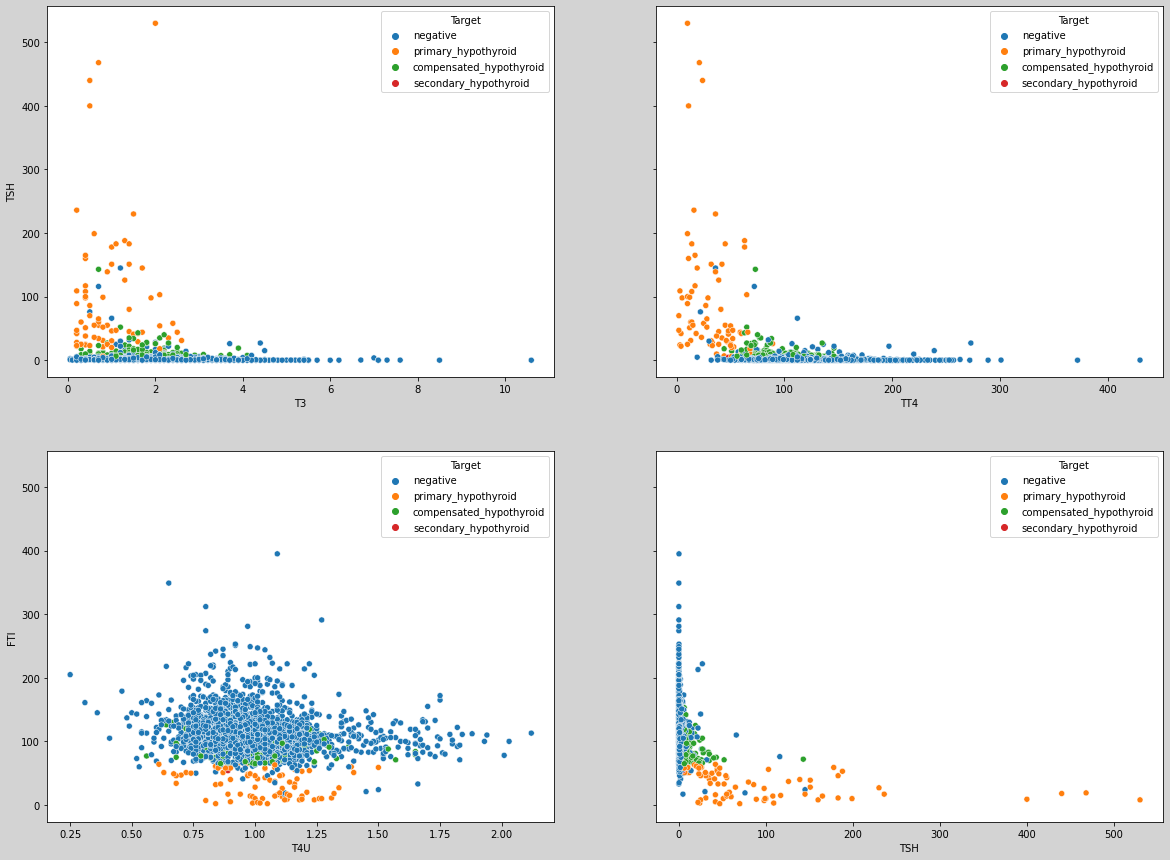

In [26]:
fig,axes = plt.subplots(2,2,sharey=True,figsize = (20,15),facecolor='lightgray')
sns.scatterplot(ax=axes[0,0],x = numeric_data['T3'],y = numeric_data['TSH'], hue=numeric_data['Target']);
sns.scatterplot(ax=axes[0,1],x = numeric_data['TT4'],y = numeric_data['TSH'], hue=numeric_data['Target']);
sns.scatterplot(ax=axes[1,0],x = numeric_data['T4U'],y = numeric_data['FTI'], hue=numeric_data['Target']);
sns.scatterplot(ax=axes[1,1],x = numeric_data['TSH'],y = numeric_data['FTI'], hue=numeric_data['Target']);


<AxesSubplot:xlabel='age'>

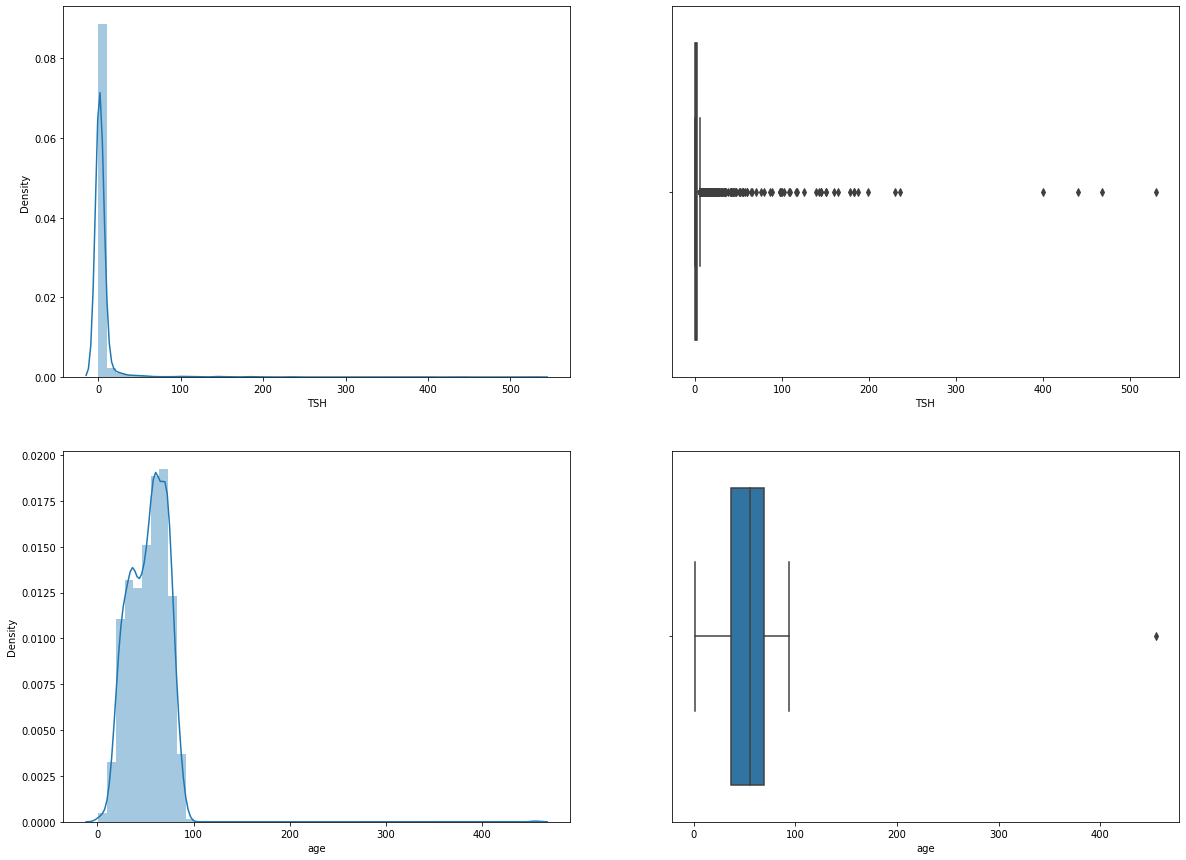

In [27]:
# we can even check the outliers and distribution of numerical features
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
sns.distplot(numeric_data.TSH)
plt.subplot(2,2,2)
sns.boxplot(numeric_data.TSH)

plt.subplot(2,2,3)
sns.distplot(numeric_data.age)
plt.subplot(2,2,4)
sns.boxplot(numeric_data.age)






<AxesSubplot:xlabel='T4U'>

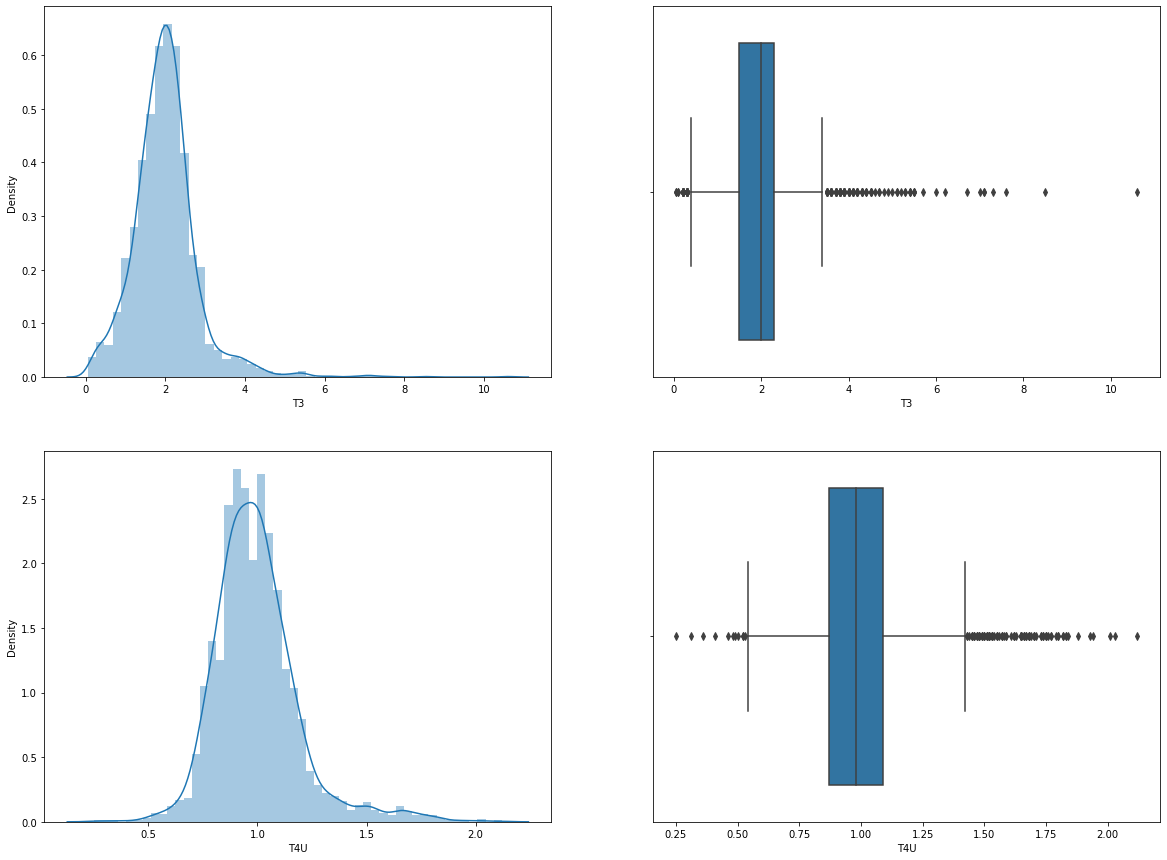

In [28]:
plt.figure(figsize=(20,15))


plt.subplot(2,2,1)
sns.distplot(numeric_data.T3)
plt.subplot(2,2,2)
sns.boxplot(numeric_data.T3)

plt.subplot(2,2,3)
sns.distplot(numeric_data.T4U)
plt.subplot(2,2,4)
sns.boxplot(numeric_data.T4U)



<AxesSubplot:xlabel='TT4'>

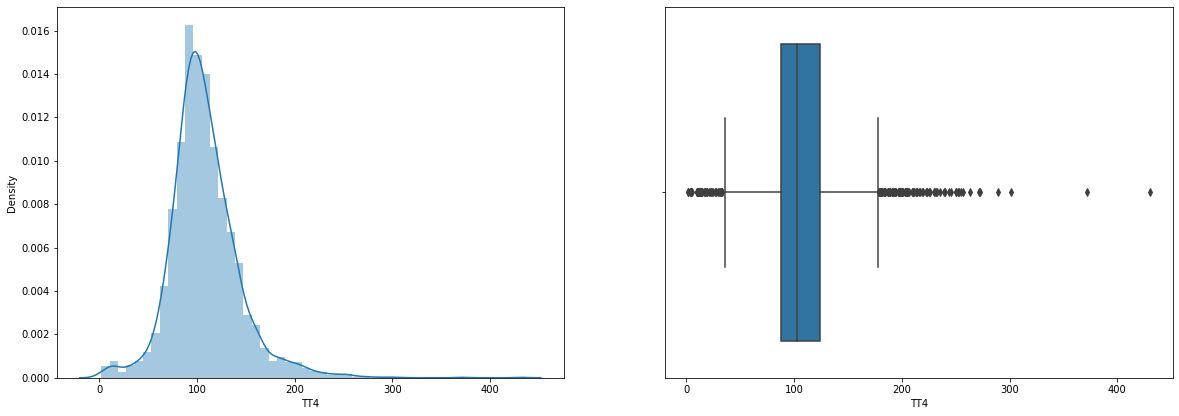

In [29]:
plt.figure(figsize=(20,15))

plt.subplot(2,2,1)
sns.distplot(numeric_data.TT4)
plt.subplot(2,2,2)
sns.boxplot(numeric_data.TT4)

In [30]:
numeric_data.TSH.unique()

array([1.30e+00, 7.20e-01, 2.20e+00, 6.00e-01, 2.40e+00, 1.10e+00,
       3.00e-02, 2.80e+00, 3.30e+00, 1.50e+00, 6.00e+00, 2.10e+00,
       8.00e-01, 1.90e+00, 2.00e-01, 1.30e+01, 3.50e-02, 2.50e+00,
       5.00e-01, 1.70e+00, 7.30e+00, 1.80e+00, 2.60e-01, 4.50e+01,
       5.40e+00, 9.90e-01, 2.50e-01, 9.20e-01, 1.50e-01, 6.40e-01,
       1.00e+00, 4.00e-01, 2.00e+00, 1.48e+01, 1.50e+01, 1.90e+01,
       3.00e+00, 3.20e+00, 5.00e-03, 6.10e-01, 1.60e+02, 1.00e-01,
       2.50e-02, 4.30e+00, 3.00e-01, 1.20e+01, 1.40e+00, 4.10e+00,
       1.60e+00, 1.51e+02, 2.00e-02, 7.80e+00, 2.60e+00, 2.30e+00,
       9.40e-01, 4.50e-02, 3.50e+00, 8.80e-01, 1.00e-02, 4.50e+00,
       3.10e+00, 6.80e-01, 7.00e-01, 1.20e+00, 7.50e-01, 5.00e-02,
       2.60e+01, 7.70e-01, 1.43e+02, 4.50e-01, 5.70e-01, 6.50e-01,
       1.50e-02, 1.08e+02, 8.30e-01, 2.70e+00, 9.20e+00, 3.90e+00,
       2.90e+00, 8.60e+01, 6.20e-01, 8.00e-02, 9.10e+00, 5.20e+01,
       3.30e-01, 9.00e-01, 6.10e+00, 3.10e+01, 2.80e-01, 5.10e

In [31]:
print("Mean of TSH --",numeric_data['TSH'].mean())
print("Mode of TSH--",numeric_data['TSH'].mode())
print("Median of TSH--",numeric_data['TSH'].median())
print("Max of TSH-- ",numeric_data['TSH'].max())
print("Min of TSH-- ",numeric_data['TSH'].min())

Mean of TSH -- 5.035978055240258
Mode of TSH-- 0    0.2
dtype: float64
Median of TSH-- 1.3
Max of TSH--  530.0
Min of TSH--  0.005


In [32]:
clms=['age','TSH','T4U','T3','TT4','FTI']
for col in clms:
    print("MEAN of ",col,"--",numeric_data[col].mean())
    
for col in clms:
    print("MEDIAN of ",col,"--",numeric_data[col].median())
   
for col in clms:
    print("MODE of ",col,"--",numeric_data[col].mode())

for col in clms:
    print("MIN Value of ",col,"--",numeric_data[col].min())

for col in clms:
    print("MAXIMUM Value of ",col,"--",numeric_data[col].max())   


MEAN of  age -- 53.08172531214529
MEAN of  TSH -- 5.035978055240258
MEAN of  T4U -- 0.9956503972758229
MEAN of  T3 -- 2.0011502080968597
MEAN of  TT4 -- 107.85773741959893
MEAN of  FTI -- 109.43473325766175
MEDIAN of  age -- 55.0
MEDIAN of  TSH -- 1.3
MEDIAN of  T4U -- 0.98
MEDIAN of  T3 -- 2.0
MEDIAN of  TT4 -- 103.0
MEDIAN of  FTI -- 107.0
MODE of  age -- 0    59
dtype: int32
MODE of  TSH -- 0    0.2
dtype: float64
MODE of  T4U -- 0    0.99
dtype: float64
MODE of  T3 -- 0    2.0
dtype: float64
MODE of  TT4 -- 0    101
dtype: int32
MODE of  FTI -- 0     93
1    100
dtype: int32
MIN Value of  age -- 1
MIN Value of  TSH -- 0.005
MIN Value of  T4U -- 0.25
MIN Value of  T3 -- 0.05
MIN Value of  TT4 -- 2
MIN Value of  FTI -- 2
MAXIMUM Value of  age -- 455
MAXIMUM Value of  TSH -- 530.0
MAXIMUM Value of  T4U -- 2.12
MAXIMUM Value of  T3 -- 10.6
MAXIMUM Value of  TT4 -- 430
MAXIMUM Value of  FTI -- 395


In [33]:
numeric_data.describe()

,age,TSH,T3,TT4,T4U,FTI
count,2643.000000,2643.000000,2643.000000,2643.000000,2643.000000,2643.000000
mean,53.081725,5.035978,2.001150,107.857737,0.995650,109.434733
std,20.367966,23.974851,0.823814,35.463208,0.196445,32.475878
min,1.000000,0.005000,0.050000,2.000000,0.250000,2.000000
25%,37.000000,0.500000,1.500000,88.000000,0.870000,93.000000
50%,55.000000,1.300000,2.000000,103.000000,0.980000,107.000000
75%,69.000000,2.600000,2.300000,124.000000,1.090000,124.000000
max,455.000000,530.000000,10.600000,430.000000,2.120000,395.000000


In [34]:
categorical_data

,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,...,hypopituitary,psych,TSH_measured,T3_measured,TT4_measured,T4U_measured,FTI_measured,TBG_measured,referral_source,Class
0,F,f,f,f,f,f,f,f,f,f,...,f,f,t,t,t,t,t,f,SVHC,negative
1,F,f,f,f,f,f,f,f,f,f,...,f,f,t,t,t,t,t,f,SVI,negative
2,F,f,f,f,f,f,f,f,f,f,...,f,f,t,t,t,t,t,f,SVI,negative
3,F,f,f,f,f,f,f,f,f,f,...,f,f,t,t,t,t,t,f,SVI,negative
4,M,f,f,f,f,f,f,f,f,f,...,f,f,t,t,t,t,t,f,SVI,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2638,F,f,f,f,f,f,f,f,f,f,...,f,f,t,t,t,t,t,f,other,compensated_hypothyroid
2639,F,f,f,f,f,f,f,f,f,f,...,f,f,t,t,t,t,t,f,SVI,negative
2640,F,f,f,f,f,f,f,f,f,t,...,f,f,t,t,t,t,t,f,other,negative
2641,M,f,f,f,f,f,f,f,f,f,...,f,f,t,t,t,t,t,f,SVI,negative


In [35]:
categorical_data=categorical_data.drop('Class',axis=1)

In [36]:
categorical_data

,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,...,tumor,hypopituitary,psych,TSH_measured,T3_measured,TT4_measured,T4U_measured,FTI_measured,TBG_measured,referral_source
0,F,f,f,f,f,f,f,f,f,f,...,f,f,f,t,t,t,t,t,f,SVHC
1,F,f,f,f,f,f,f,f,f,f,...,f,f,f,t,t,t,t,t,f,SVI
2,F,f,f,f,f,f,f,f,f,f,...,f,f,f,t,t,t,t,t,f,SVI
3,F,f,f,f,f,f,f,f,f,f,...,t,f,f,t,t,t,t,t,f,SVI
4,M,f,f,f,f,f,f,f,f,f,...,f,f,f,t,t,t,t,t,f,SVI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2638,F,f,f,f,f,f,f,f,f,f,...,f,f,f,t,t,t,t,t,f,other
2639,F,f,f,f,f,f,f,f,f,f,...,f,f,f,t,t,t,t,t,f,SVI
2640,F,f,f,f,f,f,f,f,f,t,...,f,f,f,t,t,t,t,t,f,other
2641,M,f,f,f,f,f,f,f,f,f,...,f,f,f,t,t,t,t,t,f,SVI


In [37]:
cleaned_thyroid=pd.concat([categorical_data,numeric_data],axis=1)

In [38]:
cleaned_thyroid.head()

,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,...,FTI_measured,TBG_measured,referral_source,age,TSH,T3,TT4,T4U,FTI,Target
0,F,f,f,f,f,f,f,f,f,f,...,t,f,SVHC,41,1.30,2.5,125,1.14,109,negative
1,F,f,f,f,f,f,f,f,f,f,...,t,f,SVI,70,0.72,1.2,61,0.87,70,negative
2,F,f,f,f,f,f,f,f,f,f,...,t,f,SVI,80,2.20,0.6,80,0.70,115,negative
3,F,f,f,f,f,f,f,f,f,f,...,t,f,SVI,66,0.60,2.2,123,0.93,132,negative
4,M,f,f,f,f,f,f,f,f,f,...,t,f,SVI,68,2.40,1.6,83,0.89,93,negative


In [39]:
cleaned_thyroid.to_csv('thyroid.csv',index=False)

# Analytical Aspects in thyroid dataset w.r.t Important categoricak features like:
- Pregnancy
- Goitre
- on_throxine
- lithium

In [40]:
dt=pd.read_csv("thyroid.csv")


dt.sample(5)

,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,...,FTI_measured,TBG_measured,referral_source,age,TSH,T3,TT4,T4U,FTI,Target
142,F,t,f,f,f,f,f,f,f,f,...,t,f,other,55,0.05,2.8,189,1.66,114,negative
2309,F,f,f,f,f,f,f,f,f,f,...,t,f,other,74,1.00,1.8,105,0.90,117,negative
573,F,f,f,f,t,f,f,f,f,f,...,t,f,SVI,71,0.16,2.4,165,1.35,123,negative
543,M,f,f,f,f,f,f,f,f,f,...,t,f,other,37,12.00,1.2,105,0.84,125,compensated_hypothyroid
1244,F,f,f,f,f,f,f,f,f,f,...,t,f,other,72,2.30,2.6,111,1.06,105,negative


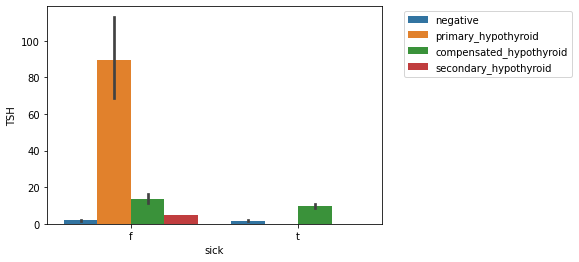

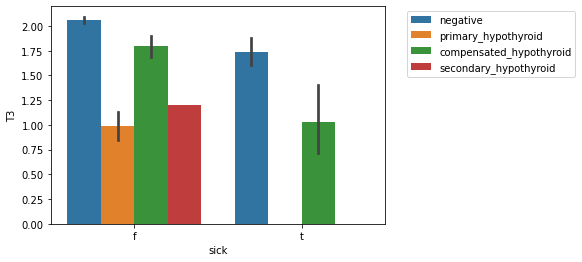

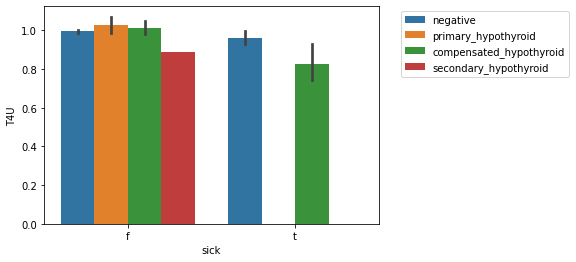

In [41]:
for i in ['TSH','T3','T4U']:
    
    sns.barplot(x = dt["sick"], y = dt[i], hue = "Target", data= dt)
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

    plt.show()

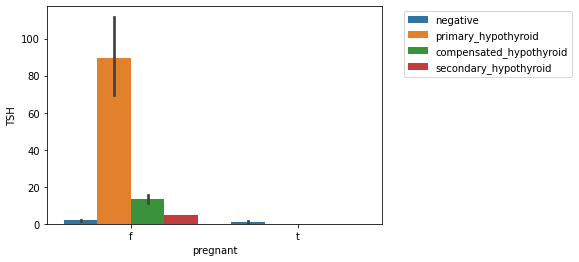

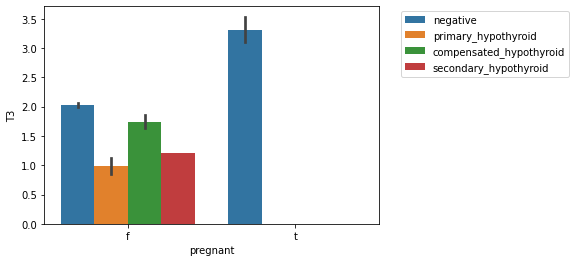

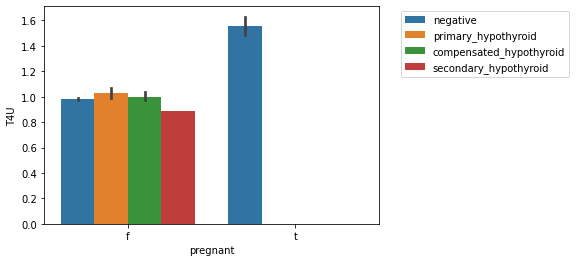

In [42]:
for i in ['TSH','T3','T4U']:
    
    sns.barplot(x = dt["pregnant"], y = dt[i], hue = "Target", data= dt)
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

    plt.show()

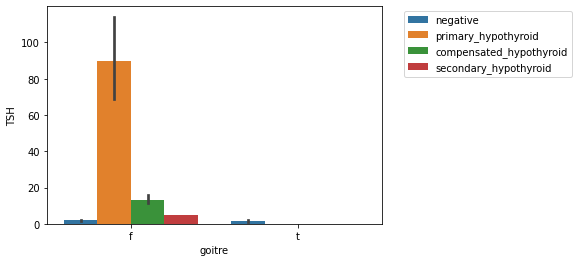

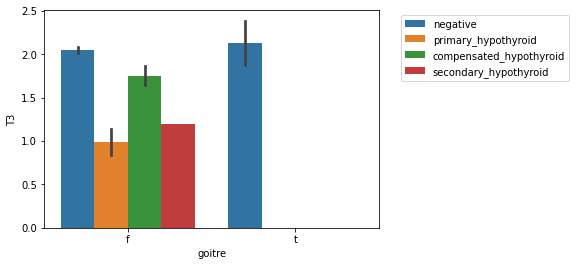

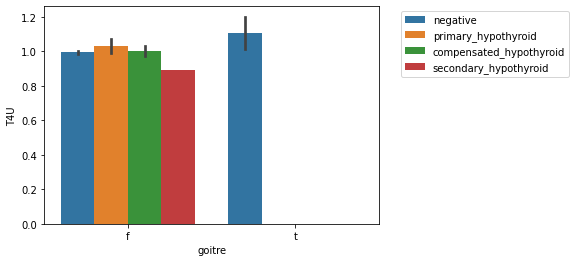

In [43]:
for i in ['TSH','T3','T4U']:
    
    sns.barplot(x = dt["goitre"], y = dt[i], hue = "Target", data= dt)
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

    plt.show()

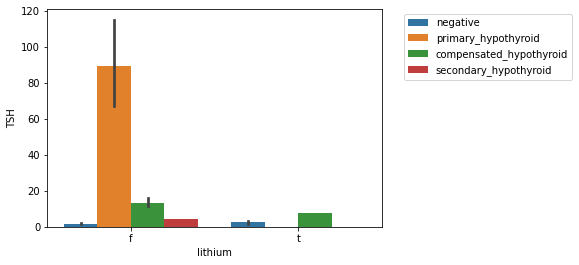

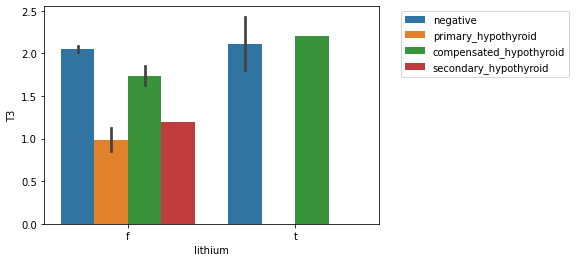

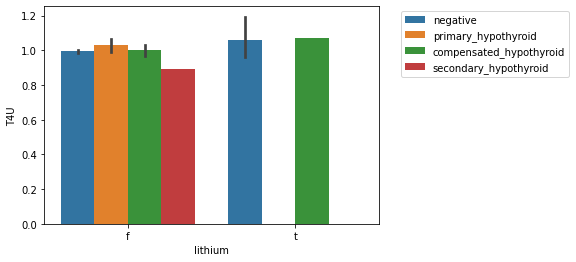

In [44]:
for i in ['TSH','T3','T4U']:
    
    sns.barplot(x = dt["lithium"], y = dt[i], hue = "Target", data= dt)
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

    plt.show()

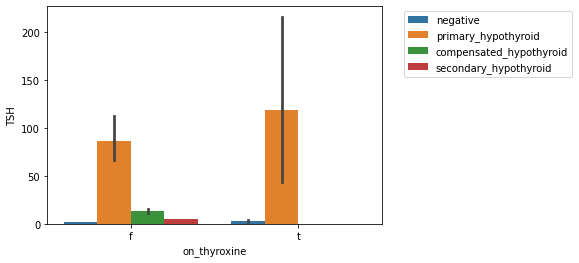

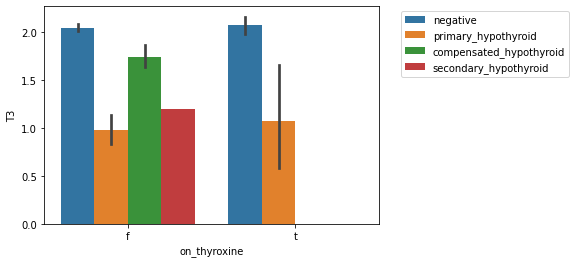

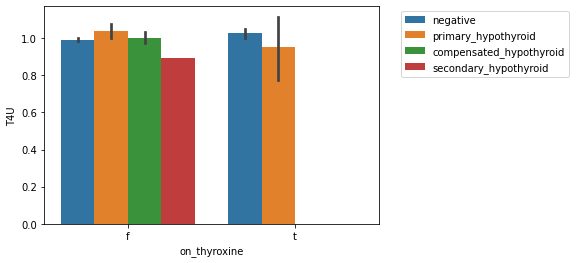

In [45]:
for i in ['TSH','T3','T4U']:
    
    sns.barplot(x = dt["on_thyroxine"], y = dt[i], hue = "Target", data= dt)
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

    plt.show()

# Final Observation:
- According to data pregnancy is not directly proportional to thyroid w.r.t to inportant tests (TSH,T3,T4U) it has very minimum dependency to target variable.
- According to data goitre is not highly linked to target variable, sample showing that people having no goitre are also facing thyroid disease (In most of the cases).
- Lithium -- T3 and T4U test turns out to be a compensated hypothyroid but people not suffering with lithium also suffering thyroid.
- on_thyroxine directly tells that tests are positive for thyroid.

THANKYOU